# Raw data collection

Step0 - Gather all data available from the source and check what is going to be important for the project

In [2]:
import pandas as pd
import geopandas as gpd


In [12]:
listings=pd.read_csv('../data/raw/listings.csv.gz')

In [13]:
pd.options.display.max_columns = None
display(listings.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,https://www.airbnb.com/users/show/2594559,Els,2012-06-10,"Amsterdam, Netherlands",NaN,within a day,87%,96%,f,https://a0.muscache.com/im/pictures/user/98c88...,https://a0.muscache.com/im/pictures/user/98c88...,Spaarndammer en Zeeheldenbuurt,1,1,"['email', 'phone']",t,t,NaN,Westerpark,NaN,52.39114,4.88846,Private room in boat,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",$100.00,2,30,2,2,30,30,2.0,30.0,NaN,t,4,16,29,212,2022-12-05,248,37,3,2016-10-06,2022-11-28,4.85,4.88,4.83,4.93,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Books and reading material"", ""Smoke alarm"", ...",$59.00,3,28,3,3,1125,1125,3.0,1125.0,NaN,t,6,27,27,27,2022-12-05,314,29,1,2009-03-30,2022-11-06,4.89,4.93,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88
2,20168,https://www.airbnb.com/rooms/20168,20221205143541,2022-12-05,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,3,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",$106.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2022-12-05,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.6

In [32]:
listings.shape

(6809, 75)

In [10]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
listings['host_listings_count'].unique()

array([  1,   3,   2,   4,  14,  13,   6,   9,   5,  21,  12,  22,   7,
       342,  11,   8,  58, 363,  29,  15,  18,  16,  33,  68,  76,  17,
       799, 502])

In [12]:
listings['host_total_listings_count'].unique()

array([  1,   5,   2,   4,   3,   6,  39,  17,  15,  18,   7,   9,  10,
         8,  21,  11,  34, 535,  14, 673,  57,  12,  33,  29,  22,  28,
       307,  51, 249,  76, 416,  16,  46,  13,  23,  26, 117,  44,  59,
        25,  82,  72,  24, 104, 799, 509])

In [14]:
listings['host_identity_verified'].value_counts()

t    5840
f     969
Name: host_identity_verified, dtype: int64

In [15]:
listings['neighbourhood'].value_counts()

Amsterdam, Noord-Holland, Netherlands                          3579
Amsterdam, North Holland, Netherlands                           516
Amsterdam, NH, Netherlands                                      189
Amsterdam, Netherlands                                           43
Amsterdam-Zuidoost, Noord-Holland, Netherlands                   16
Amsterdam, Nord Holland, Netherlands                             14
Ouder-Amstel, Noord-Holland, Netherlands                          9
Amsterdam-Zuidoost, North Holland, Netherlands                    8
Amsterdam, Noord Holland, Netherlands                             7
Badhoevedorp, Noord-Holland, Netherlands                          3
Amsterdam, No, Netherlands                                        2
Lijnden, Noord-Holland, Netherlands                               2
Amsterdam, Haarlemmerbuurt, Netherlands                           2
Watergraafsmeer, North Holland, Netherlands                       2
Amsterdam, Holland, Netherlands                 

In [16]:
listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    1066
Centrum-West                               930
De Pijp - Rivierenbuurt                    760
Centrum-Oost                               680
Westerpark                                 468
Zuid                                       447
Oud-Oost                                   397
Bos en Lommer                              331
Oud-Noord                                  311
Oostelijk Havengebied - Indische Buurt     257
Watergraafsmeer                            199
Noord-West                                 173
IJburg - Zeeburgereiland                   164
Slotervaart                                147
Noord-Oost                                 110
Geuzenveld - Slotermeer                     88
Buitenveldert - Zuidas                      70
De Aker - Nieuw Sloten                      54
Bijlmer-Centrum                             45
Gaasperdam - Driemond                       44
Osdorp                                      43
Bijlmer-Oost 

In [19]:
listings['neighbourhood_group_cleansed'].unique()

array([nan])

In [20]:
listings['property_type'].unique() #Group in few categories

array(['Private room in boat', 'Private room in rental unit',
       'Private room in townhouse', 'Private room in houseboat',
       'Entire rental unit', 'Entire guest suite',
       'Private room in bed and breakfast', 'Private room in home',
       'Entire guesthouse', 'Entire townhouse', 'Room in boutique hotel',
       'Entire condo', 'Entire loft', 'Private room in guest suite',
       'Entire home', 'Private room in loft', 'Boat',
       'Private room in condo', 'Houseboat', 'Room in bed and breakfast',
       'Shared room in home', 'Private room in guesthouse',
       'Private room in farm stay', 'Private room in serviced apartment',
       'Entire villa', 'Private room in villa',
       'Private room in tiny home', 'Private room in casa particular',
       'Entire serviced apartment', 'Barn', 'Private room in bungalow',
       'Shared room in rental unit', 'Entire cabin', 'Room in hotel',
       'Entire place', 'Room in aparthotel', 'Tiny home',
       'Private room in cabin'

In [21]:
listings['property_type'].value_counts()

Entire rental unit                    2384
Entire condo                          1284
Private room in rental unit            520
Entire home                            432
Private room in bed and breakfast      294
Entire townhouse                       213
Entire loft                            186
Private room in condo                  135
Houseboat                              132
Private room in home                   130
Room in boutique hotel                 122
Room in hotel                          117
Private room in houseboat              102
Private room in guest suite             99
Private room in townhouse               91
Boat                                    83
Entire serviced apartment               70
Private room in boat                    57
Private room in loft                    41
Room in bed and breakfast               26
Shared room in hostel                   23
Entire guest suite                      23
Room in aparthotel                      20
Entire vill

In [23]:
listings['room_type'].value_counts()

Entire home/apt    4910
Private room       1798
Hotel room           62
Shared room          39
Name: room_type, dtype: int64

In [25]:
listings['accommodates'].value_counts()

2     3586
4     2173
3      525
1      183
6      146
5      115
7       24
8       20
16      17
12       9
14       3
0        3
10       2
9        2
13       1
Name: accommodates, dtype: int64

In [29]:
listings['bathrooms_text'].unique()

array(['1.5 baths', '1.5 shared baths', '1 private bath', '1 shared bath',
       '1 bath', '2.5 baths', '3.5 baths', '0 baths', 'Private half-bath',
       '2 baths', '3 baths', '0 shared baths', 'Half-bath', nan,
       '5 baths', 'Shared half-bath', '2 shared baths', '5.5 baths',
       '4 baths', '4.5 baths', '4 shared baths', '17 baths',
       '3 shared baths'], dtype=object)

In [33]:
listings['bedrooms'].value_counts()
#listings['bedrooms'].dtype #change to int

1.0     4014
2.0     1632
3.0      645
4.0      186
5.0       30
10.0       5
8.0        5
6.0        3
7.0        2
17.0       1
Name: bedrooms, dtype: int64

In [35]:
listings['beds'].value_counts()
#listings['beds'].dtype #change to int

1.0     3578
2.0     1785
3.0      725
4.0      390
5.0      130
6.0       59
7.0       11
12.0       6
8.0        6
20.0       3
11.0       3
18.0       3
16.0       3
14.0       3
9.0        2
26.0       2
24.0       2
22.0       2
17.0       1
13.0       1
10.0       1
33.0       1
30.0       1
Name: beds, dtype: int64

In [36]:
listings['amenities'].unique() #Think about it

array(['["Bed linens", "Dishes and silverware", "Hangers", "Wifi", "Fire extinguisher", "Microwave", "Private entrance", "Smoking allowed", "Long term stays allowed", "Shampoo", "River view", "Essentials", "Waterfront", "Luggage dropoff allowed", "Hot water", "Lock on bedroom door", "Host greets you", "Refrigerator", "Heating", "Harbor view"]',
       '["Books and reading material", "Smoke alarm", "Fire extinguisher", "Dedicated workspace", "Paid parking off premises", "Room-darkening shades", "Paid washer \\u2013 In unit", "Bed linens", "Private entrance", "Outdoor furniture", "Fast wifi \\u2013 52 Mbps", "Security cameras on property", "Mini fridge", "Essentials", "Ethernet connection", "Sony + Wireless Bluetooth Speaker(phone) Bluetooth sound system", "Central heating", "Cleaning products", "First aid kit", "Carbon monoxide alarm", "Paid parking on premises", "Extra pillows and blankets", "PH neutral and dermatologically tested shampoo", "Hot water kettle", "Clothing storage: wardro

In [52]:
listings['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6809 entries, 0 to 6808
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
6809 non-null   object
dtypes: object(1)
memory usage: 53.3+ KB


In [54]:
listings['minimum_nights'].value_counts()

2       2112
3       1795
1       1181
4        656
5        422
7        246
6        117
14        50
10        42
28        29
30        22
21        21
12        14
8         12
20        11
60         9
15         8
9          7
31         7
25         6
16         5
18         4
1000       4
100        3
13         3
24         2
27         2
300        2
180        2
150        1
800        1
55         1
183        1
40         1
26         1
29         1
45         1
11         1
75         1
120        1
93         1
500        1
1001       1
90         1
Name: minimum_nights, dtype: int64

In [56]:
listings['maximum_nights'].value_counts()

1125    2194
365      915
30       847
14       392
7        244
        ... 
79         1
1120       1
295        1
220        1
109        1
Name: maximum_nights, Length: 106, dtype: int64

In [15]:
listings['calendar_updated'].unique()

array([nan])

In [18]:
listings['has_availability'].value_counts()

t    6756
f      53
Name: has_availability, dtype: int64

In [23]:
listings['number_of_reviews'].isna().sum()

0

In [24]:
listings['review_scores_rating'].value_counts()

5.00    1976
4.88     179
4.89     154
4.86     152
4.75     151
        ... 
4.15       1
3.43       1
4.11       1
4.02       1
4.06       1
Name: review_scores_rating, Length: 118, dtype: int64

In [27]:
listings['review_scores_value'].value_counts()

5.00    962
4.67    302
4.50    293
4.75    212
4.80    195
       ... 
3.76      1
4.05      1
3.95      1
2.71      1
3.94      1
Name: review_scores_value, Length: 135, dtype: int64

In [29]:
listings_ams=listings[['name','description','neighborhood_overview','host_id','host_about','host_response_time',
                     'host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified',
                     'neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates',
                     'bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','maximum_nights',
                     'has_availability','number_of_reviews','review_scores_rating','review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                     'review_scores_location','review_scores_value','instant_bookable']]


In [30]:
listings_ams

,name,description,neighborhood_overview,host_id,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,2594559,NaN,within a day,87%,96%,f,t,Westerpark,52.391140,4.888460,Private room in boat,Private room,2,1.5 baths,1.0,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",$100.00,2,30,t,248,4.85,4.88,4.83,4.93,4.90,4.78,4.72,f
1,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",3159,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,t,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room in rental unit,Private room,2,1.5 shared baths,1.0,2.0,"[""Books and reading material"", ""Smoke alarm"", ...",$59.00,3,28,t,314,4.89,4.93,4.99,4.97,4.98,4.69,4.81,f
2,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,59484,+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,t,Centrum-Oost,52.364070,4.893930,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",$106.00,1,365,t,339,4.44,4.69,4.79,4.63,4.62,4.87,4.49,t
3,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",97647,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,t,t,Centrum-West,52.387610,4.891880,Private room in houseboat,Private room,2,1.5 baths,1.0,1.0,"[""Books and reading material"", ""Smoke alarm"", ...",$140.00,2,356,t,243,4.94,4.93,4.95,4.95,4.92,4.89,4.79,t
4,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",124245,Hi,within a few hours,100%,100%,t,t,Centrum-West,52.367750,4.890920,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Lock on bedroom...",$75.00,2,1825,t,454,4.88,4.93,4.89,4.95,4.94,4.97,4.83,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,Romantic Houseboat in the center,Located in the center everything can be walked...,"Redlight district, Waterlooplein market, every...",4184910,"Hello,\r\n\r\nMy name is Lydia and live in Ams...",within a day,80%,88%,t,t,Centrum-Oost,52.368637,4.899096,Private room in boat,Private room,2,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Fire extinguisher"", ""Waterfro...",$165.00,1,1125,t,343,4.76,4.83,4.64,4.86,4.71,4.93,4.59,f
6805,mediterranean ambiance appartment,<b>The space</b><br />If you love Mediterranea...,NaN,4215174,It' s been already more than 20 years that I l...,within a day,100%,0%,f,t,De Baarsjes - Oud-West,52.368840,4.861270,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Kitchen"", ""Wifi"", ""TV"", ""Oven"", ""Hot water"",...",$150.00,4,14,t,18,4.83,4.83,4.67,4.94,5.00,4.67,4.50,f
6806,Charlie + Coco's Apartment,Charlie + Coco are looking forward to welcome ...,NaN,1657181,.,within an hour,100%,83%,f,t,De Pijp - Rivierenbuurt,52.352050,4.902670,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Smoke alarm"", ""Patio or balcony"", ""Coffee ma...",$160.00,3,1124,t,97,4.57,4.66,4.41,4.68,4.71,4.76,4.41,f
6807,Sleeping in a unique ship in the center of A'dam!,Thank you for finding me. I offer you an uniqu...,The Keizerinn BnB is located in one of the old...,4221960,

In [34]:
listings_ams.to_csv('../data/cleaned/listings_ams.csv')

In [11]:
data = pd.read_csv('../data/raw/listings.csv')

In [12]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,816940,Old South Lovely Garden Apartment,4290554,Joyce,NaN,Zuid,52.353230,4.854210,Entire home/apt,165,6,63,2022-11-28,0.54,1,11,2,03632A9BE56A736890D1
1,528022,Somewhere Else,2594559,Els,NaN,Westerpark,52.391140,4.888460,Private room,100,2,248,2022-11-28,3.30,1,212,37,0363 9289 A94D 5C21 A579
2,538723,Beautiful ground floor apartment,356740,Dimphy,NaN,Watergraafsmeer,52.354000,4.939650,Entire home/apt,140,5,57,2020-01-01,0.45,1,0,0,0363 D990 F92F DECF 88D4
3,549310,Family Apartment with Garden,2699033,Barbara,NaN,De Baarsjes - Oud-West,52.371260,4.862410,Entire home/apt,200,2,54,2022-08-10,0.60,1,7,7,0363 35CD 76C9 04D4 1A21
4,553514,"B&B WestergasTverblijf , Cosy!",618589,Mirjam,NaN,Westerpark,52.384440,4.869160,Entire home/apt,80,2,162,2020-02-16,1.34,1,1,0,0363 AD82 ADCF 17F3 C3EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,733683952767062833,Trendy and cozy apartment with garden,50271149,Vivian,NaN,De Baarsjes - Oud-West,52.360020,4.863760,Entire home/apt,307,2,2,2022-10-31,1.54,1,17,2,0363 FDAD 4CF5 2483 70D7
6805,733803741061691698,Mooi appartement met balkon in Amsterdam Oost,10620995,Sake,NaN,Oostelijk Havengebied - Indische Buurt,52.363355,4.931658,Entire home/apt,175,3,0,NaN,NaN,1,65,0,0363 70F6 15D3 57EA 1C02
6806,733852793472777240,"Nette, mooi woning in Amsterdam.",17233915,Nilufer,NaN,Centrum-Oost,52.361620,4.913230,Entire home/apt,250,1,0,NaN,NaN,1,201,0,0363E95CF2677E1D6C63
6807,733866906581223578,Luxe appartement aan de gracht,82496709,Jurrien,NaN,Centrum-West,52.371520,4.882030,Entire home/apt,205,1,0,NaN,NaN,1,36,0,0363 F5C3 B000 EB91 6277


In [14]:
calendar = pd.read_csv('../data/raw/calendar.csv.gz')


In [16]:
calendar.tail(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2485275,522471,2023-11-25,f,$190.00,$190.00,8,25
2485276,522471,2023-11-26,f,$190.00,$190.00,8,25
2485277,522471,2023-11-27,f,$190.00,$190.00,8,25
2485278,522471,2023-11-28,f,$190.00,$190.00,8,25
2485279,522471,2023-11-29,f,$190.00,$190.00,8,25
2485280,522471,2023-11-30,f,$190.00,$190.00,8,25
2485281,522471,2023-12-01,f,$190.00,$190.00,8,25
2485282,522471,2023-12-02,f,$190.00,$190.00,8,25
2485283,522471,2023-12-03,f,$190.00,$190.00,8,25
2485284,522471,2023-12-04,f,$190.00,$190.00,8,25


In [10]:
reviews = pd.read_csv('../data/raw/reviews.csv.gz')



In [19]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
326828,752166367025306349,765028142917928706,2022-11-21,118898483,Andrew,We had a very good stay here. Nanette was very...
326829,769435268579370396,774500498389572112,2022-12-04,253684391,Bastien,Super hôtel avec un accueil chaleureux et très...
326830,769460764152625515,774428988619858347,2022-12-04,130282249,Endri,"Very friendly, easy and fast check in, great l..."
326831,769483610559319327,774522275973029837,2022-12-04,277119304,Jian,It was really great to visit Anco Hotel. I was...


In [8]:
neighbourhoods = pd.read_csv('../data/raw/neighbourhoods.csv')



In [9]:
neighbourhoods

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost
5,NaN,Centrum-West
6,NaN,De Aker - Nieuw Sloten
7,NaN,De Baarsjes - Oud-West
8,NaN,De Pijp - Rivierenbuurt
9,NaN,Gaasperdam - Driemond


In [3]:
geolocation = gpd.read_file('../data/raw/neighbourhoods.geojson')

In [4]:
geolocation

,neighbourhood,neighbourhood_group,geometry
0,Bijlmer-Oost,None,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4..."
1,Noord-Oost,None,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5..."
2,Noord-West,None,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4..."
3,Oud-Noord,None,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4..."
4,IJburg - Zeeburgereiland,None,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5..."
5,Centrum-West,None,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4..."
6,Oostelijk Havengebied - Indische Buurt,None,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4..."
7,Centrum-Oost,None,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4..."
8,Oud-Oost,None,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4..."
9,Watergraafsmeer,None,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4..."


<AxesSubplot: >

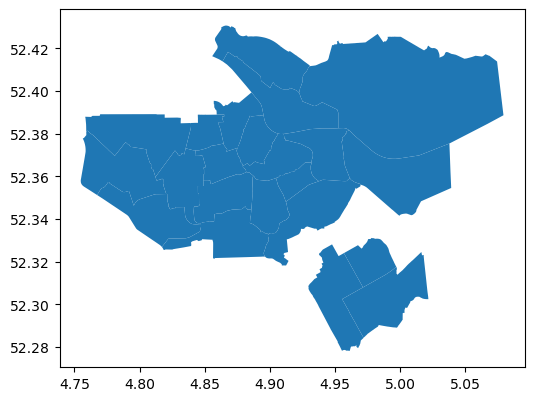

In [6]:
geolocation.plot(figsize=(6, 6))


Summary step 0 
listings = listings.csv.gz - (6809, 75) - Amsterdam properties listed on Airbnb
data = listings.csv - summary of the data above
calendar = calendar.csv.gz - dates available, min and max nights for booking
reviews = reviews.csv - Review comments
neighbourhoods = neighbourhoods.csv - list of neighbourhoods name
geolocation = neighbourhoods.geojson - neighbourhoods and geometry to build maps

After analysing each dataset, the listings_ams is the dataframe selected for the next stage. This dataset contains 33 columns.
